# Final Project Visualization (50 points)

Do a shift-enter in all code blocks to execute.  You will need to enter commands in some blocks before executing.  Each place where this is necessary, you will see the points awarded for correct completion.  Do NOT change other code blocks.  (You will see "edit this block" in blocks which do need editing.)  This exercise will also help you to understand the Module 14: Lab, which does not permit visualization.

In [431]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
print ("hello")

hello


You will need to to edit the files find_stars.py and measure_stars.py which are in a folder called ses350.  Alternatively, you can comment the import statements out and paste your code to define the functions find_stars and measure_stars directly into the next block.

After you make any changes to this notebook, I recommend running a "Run all" from the Runtime menu.  Alternatively, you can use the Ctrl+F9 shortcut to accomplish this.  This operation will reload all of your code and automatically execute all code blocks, saving you some time.

In [432]:
!git clone https://github.com/nrbutler/ses350  # only need to do this once
import sys
sys.path.append("ses350")

fatal: destination path 'ses350' already exists and is not an empty directory.


In [433]:
# you can change this block if need be
from find_stars import find_stars
from measure_stars import measure_stars


Now, let's simulate some images and get to work.  The simulator inserts one special star, a star which is quite variable and is also periodic.  Do not change this code.

30
(512, 512)


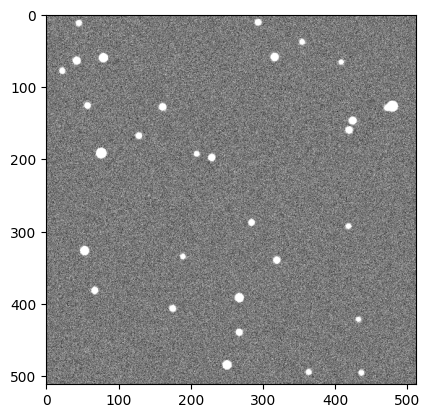

In [434]:
# get the data simulator
from simulate_image_stack import imsim_multi

data = imsim_multi()
print (len(data))
print (data[0].shape)

# stacked image for source detection
im0 = np.mean(data,axis=0)
plt.imshow(im0.clip(-30,30),cmap='gray')

At this point, you should not be able to spot the interesting star.  But it's in there! Let's find the stars in that image and measure the fluxes in all images.

In [435]:
# run your find_stars, add any other arguments if needed
sx,sy = find_stars(im0)

# 2d numpy array of the fluxes in each image and run measure_stars
N,M = len(data),len(sx)
flux = np.zeros((N,M),dtype='float32')

# run your measure_stars, add any other arguments if needed
for i in range(N):
    flux[i] = measure_stars(data[i],sx,sy)

Plot the time history ("lightcurve") for the first star detected.  It should look a little noisy.  You could make a plot like this for each star by replacing 0 with another integer.

Text(0, 0.5, 'Flux [counts]')

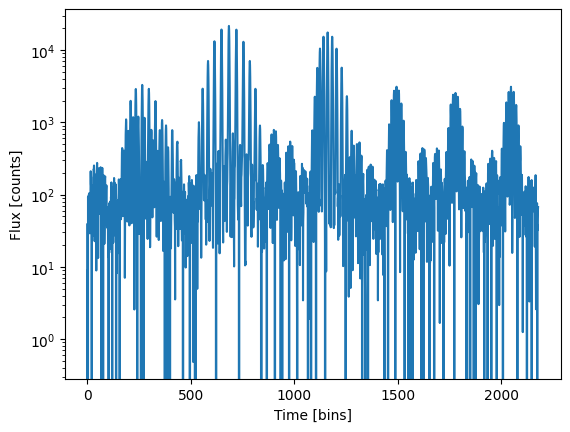

In [436]:
plt.plot(flux[0])
plt.semilogy()
plt.xlabel("Time [bins]")
plt.ylabel("Flux [counts]")

In this final phase of the final project, you will sort through your set of lightcurves to look for variability and periodicity.  We will first need to calculate the mean and variance for each lightcurve.

Text(0, 0.5, 'Flux Variance [counts]')

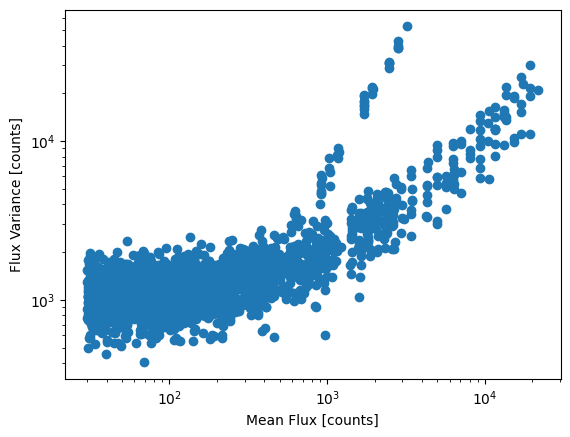

In [437]:
ff = flux.mean(axis=0)   # length M, mean flux for each star
vff = flux.var(axis=0)   # length M, flux variance for each star
plt.plot(ff,vff,'o')
plt.loglog()
plt.xlabel("Mean Flux [counts]")
plt.ylabel("Flux Variance [counts]")

Does one of those points look different from the rest?

## Identifying a Variable Star

First, let's calculate the power spectral density for each star, PSD.  This can be done with one call to fft, which calculates it for every star at once.

In [438]:
psd = np.abs( fft(flux-ff,axis=0)[:int(N/2)] )**2/(N*vff)

Let's plot the first one.

In [439]:
print (psd.shape)

(15, 2180)


Text(0, 0.5, 'PSD')

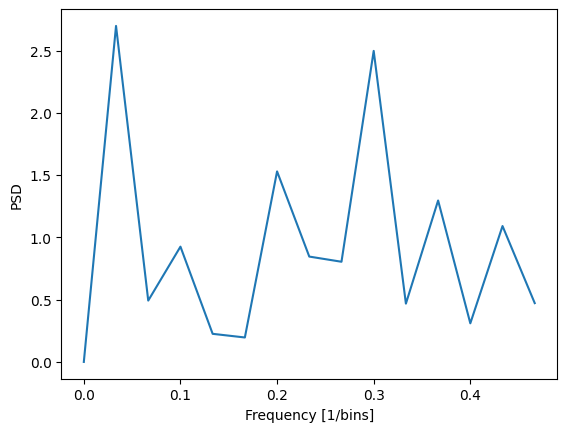

In [440]:
plt.plot (np.arange(N/2)/N,psd[:,0])
plt.xlabel("Frequency [1/bins]")
plt.ylabel("PSD")

If this is the periodic sources, there should be a large, narrow spike somewhere in the middle of the plot.  We probably have to look at more sources to find the interesting one.

### Looking at variability alone.

Make a histogram plot first of the variance over the mean.  Here, we're careful to clip low mean values.  Use the definition of y below and make a histogram plot.

In [441]:
y = vff/ff.clip(vff.min())

You will now start to add your own code, changing some of the blocks below.
In the next block, make a histogram plot of y using plt.hist for 10 points.

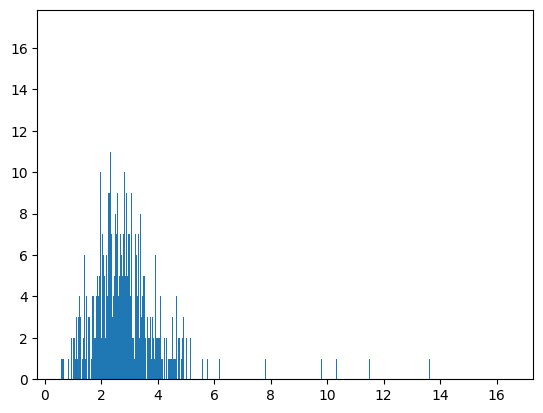

In [442]:
# edit this block
# make a histogram plot of y using plt.hist (10 points)
plt.hist(y, bins = y.size)
plt.show()


Do you see an interesting source?  Print out the 3 most variable:

In [443]:
s = y.argsort()[::-1]
for i in range(3):
    print ("Source ID {:-2d}, vff/ff: {:5.1f}".format(s[i],y[s[i]]))

Source ID 266, vff/ff:  16.5
Source ID 267, vff/ff:  15.0
Source ID 235, vff/ff:  14.1


Make a histogram plot next of the highest PSD peak:  Use the definition of y1 below and make this second histogram plot.
In the next code block after this, make a histogram plot of y1 using plt.hist for 10 points

In [444]:
y1 = psd.max(axis=0)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([ 1.42033625,  1.42646396,  1.43259156, ..., 14.76639748,
        14.77252579, 14.77865219]),
 <BarContainer object of 2180 artists>)

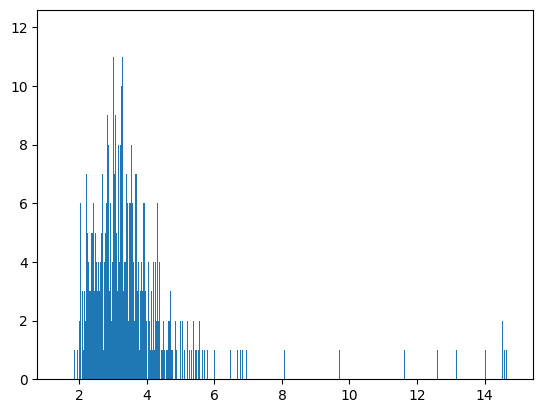

In [445]:
# edit this block
# make a histogram plot of y1 using plt.hist (10 points)
plt.hist(y1 , bins=y1.size)


Do you see an interesting source now?  Print out the 3 most variable.

In [446]:
s = y1.argsort()[::-1]
for i in range(3):
    print ("Source ID {:-2d}, max(psd): {:5.1f}".format(s[i],y1[s[i]]))

Source ID 299, max(psd):  14.8
Source ID 234, max(psd):  14.8
Source ID 235, max(psd):  14.7


Now make a scatter plot of y1 versus y.  Is there clearly something interesting there?
In the next block, make a scatter plot of y1 versus y using plt.plot or plt.scatter.  Create informative x and y axis labels.

Text(0, 0.5, 'Variance')

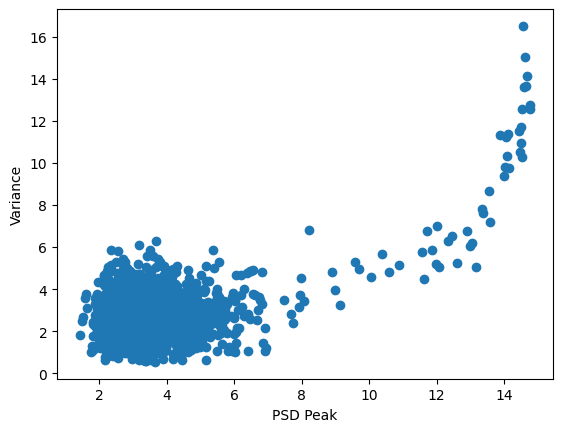

In [454]:
# edit this block
# make a scatter plot of y1 versus y using plt.plot or plt.scatter.  Create informative x and y axis labels (10 points)
plt.scatter(y1,y)
plt.xlabel("PSD Peak")
plt.ylabel("Variance")

Finally, for 20 points, copy in your algorithm from Module 14: Lab in the zybook for finding the periodic source.
Be sure to paste in just your function definition and not import statements or code beginning or after the line "if __name__ == __main__".

In [448]:
# edit this block
#
# paste here your definition for the find_periodic_source function (from the Module 14 Lab) here and run with shift-enter (20 points)
#
#  if this is done correctly, the code blocks below can then be executed; you will not need to change any more code blocks below.
#
# Warning: do not copy in the lines including and below if __name__ == "__main__":, because these are not part of the function.
#


def find_periodic_source(data):
    """
        complete this function to find the periodic star!
    """
    # stacked image for source detection
    im0 = np.mean(data,axis=0)

    # run your find_stars, add any other arguments if needed
    sx,sy = find_stars(im0)

    # 2d numpy array to hold fluxes in each image
    N,M = len(data),len(sx)
    flux = np.zeros((N,M),dtype='float32')

    # run your measure_stars, add any other arguments if needed
    for i in range(N):
        flux[i] = measure_stars(data[i],sx,sy)

    # some other useful things
    ff = flux.mean(axis=0)   # length M, mean flux for each star
    vff = flux.var(axis=0)   # length M, flux variance for each star

    # shape (N/2,M) power spectral density for each star
    psd = np.abs( fft(flux-ff,axis=0)[:int(N/2)] )**2/(N*vff)

    # WORK HERE:
    #  write code to define psdm = maximum(psd) and
    #  i and j such that psd[i,j] = psdm
    psdm = np.max(psd)
    # print(psdm)
    # help(psdm)
    x,y = np.where(psd >= psdm)
    i = x[0]
    j = y[0]

    # use these definitions
    period = 1.*N/i
    amplitude = np.sqrt(psdm*vff[j]/N)*2/ff[j]

    return j,period,amplitude




In [449]:
# this will run your find_periodic_source function.  do not change this or any code below.
j,period,ampl = find_periodic_source(data)

With our coding done, let's generate plots of the periodic source.  This plot should show one, nice spike, which corresponds to the periodic source.

Text(0, 0.5, 'PSD')

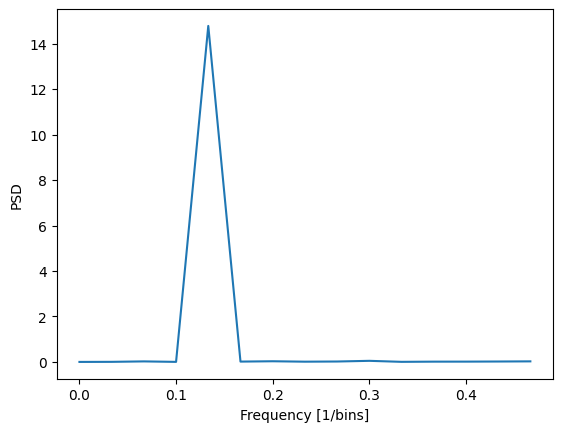

In [450]:
plt.plot (np.arange(N/2)/N,psd[:,j])
plt.xlabel("Frequency [1/bins]")
plt.ylabel("PSD")

You can now also plot the lightcurve and what's called the folded lightcurve.

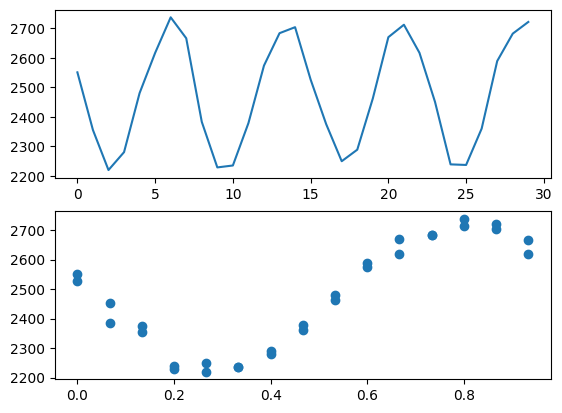

In [451]:
fig,ax=plt.subplots(2)
ax[0].plot(flux[:,j])
ax[1].plot((np.arange(30)/period)%1,flux[:,j],'o')

You should be able to see the periodic behavior in the top plot.  The curve in the plot should look like a sine function or like a sawtooth pattern, and it should not look like noise.  The bottom plot shows the data from the top plot "folded" onto the period, allowing you to see what happens during one cycle.  The data points should form a fairly smooth curve, and it should not look like noise.

Once your notebook runs without errors, and you are happy with how the plots look, save the notebook.  Then Download it to your computer using "Download .ipynb" from the File menu.  Email the notebook to your instructor to receive credit.